# 01_load_gct.ipynb

Deze notebook laadt een .gct genexpressie-bestand, voert een log-transformatie uit op TPM-waarden, maakt een boxplot, en slaat het resultaat op als CSV. Dit is de eerste stap in de GBM-classificatie pipeline.

In [3]:
import sys
print(f"Python versie: {sys.version}")
assert sys.version_info[:2][0] == (3), "Gebruik Python 3.* voor deze omgeving!"

Python versie: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [ ]:
import pkg_resources
required = ["scikit-learn", "matplotlib", "pandas", "numpy"]
for pkg in required:
    try:
        dist = pkg_resources.get_distribution(pkg)
        print(f"{pkg}: {dist.version}")
    except Exception as e:
        print(f"{pkg} NIET gevonden! {e}")

scikit-learn: 1.6.1
matplotlib: 3.10.0
pandas: 2.2.3
numpy: 2.2.2
jupyter NIET gevonden! The 'jupyter' distribution was not found and is required by the application
pycombat NIET gevonden! The 'pycombat' distribution was not found and is required by the application


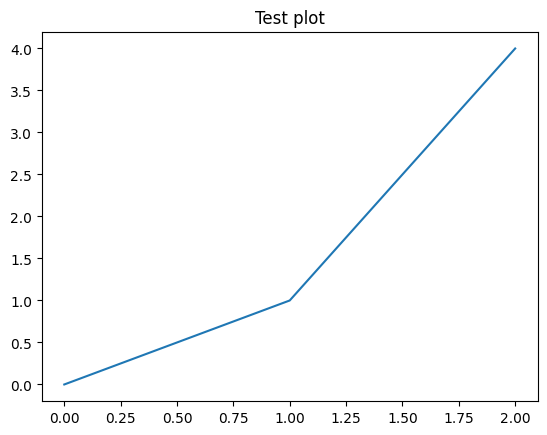

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Test DataFrame
pd.DataFrame({"A": [1,2], "B": [3,4]})

# Test plot
plt.plot([0,1,2], [0,1,4])
plt.title("Test plot")
plt.show()

## Inladen van het .gct genexpressie-bestand

We lezen het .gct-bestand in met pandas.

In [6]:
# Pad naar het .gct-bestand
gct_path = '../data/raw/gene_tpm_v10_brain_cerebellum.gct'
with open(gct_path) as f:
    header1 = f.readline()
    header2 = f.readline()
df = pd.read_csv(gct_path, sep='\t', skiprows=2)
print(f'Vorm van dataframe: {df.shape}')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/gene_tpm_v10_brain_cerebellum.gct'

## Log-transformatie van TPM-waarden

We voeren een log2(TPM+1) transformatie uit op de expressiewaarden.

In [ ]:
# Neem aan dat de eerste twee kolommen annotatie zijn (bijv. Name, Description)
expr = df.iloc[:, 2:]
expr_log = np.log2(expr + 1)
df_log = pd.concat([df.iloc[:, :2], expr_log], axis=1)
df_log.head()

,Name,Description,GTEX-111FC-3326-SM-5GZYV,GTEX-1128S-2826-SM-5N9DI,GTEX-117XS-3126-SM-5GIDP,GTEX-1192X-3226-SM-5987D,GTEX-11DXW-1026-SM-5H11K,GTEX-11DXY-3126-SM-5N9BT,GTEX-11DYG-2926-SM-5H132,GTEX-11DZ1-2926-SM-5A5KI,...,GTEX-ZAJG-3026-SM-5HL92,GTEX-ZAK1-2926-SM-5HL9S,GTEX-ZDXO-2926-SM-4WKFM,GTEX-ZF28-2926-SM-4WKG1,GTEX-ZUA1-2926-SM-59HL3,GTEX-ZVT3-2926-SM-5GU6M,GTEX-ZVZQ-2826-SM-HL9U2,GTEX-ZYFD-2926-SM-5GID9,GTEX-ZYY3-3026-SM-5GIEJ,GTEX-ZZPT-2926-SM-5EQ5S
0,ENSG00000223972.5,DDX11L1,0.000000,0.000000,0.053314,0.046970,0.000000,0.000000,0.043074,0.045629,...,0.048084,0.000000,0.045767,0.000000,0.000000,0.000000,0.000000,0.000000,0.037940,0.045134
1,ENSG00000227232.5,WASH7P,3.085657,3.331486,3.160294,2.778137,2.628027,3.029654,3.327124,2.277669,...,2.962569,2.307729,3.110624,2.844026,2.005713,2.954543,3.913818,2.717048,2.657219,2.214436
2,ENSG00000278267.1,MIR6859-1,0.837023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000243485.5,MIR1302-2HG,0.000000,0.000000,0.000000,0.179056,0.094798,0.073930,0.000000,0.089708,...,0.000000,0.000000,0.000000,0.100033,0.000000,0.000000,0.086797,0.105673,0.145880,0.000000
4,ENSG00000237613.2,FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060721,0.064299,...,0.000000,0.000000,0.064492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Boxplot van getransformeerde TPM-waarden

Visualiseer de distributie van de log-getransformeerde TPM-waarden.

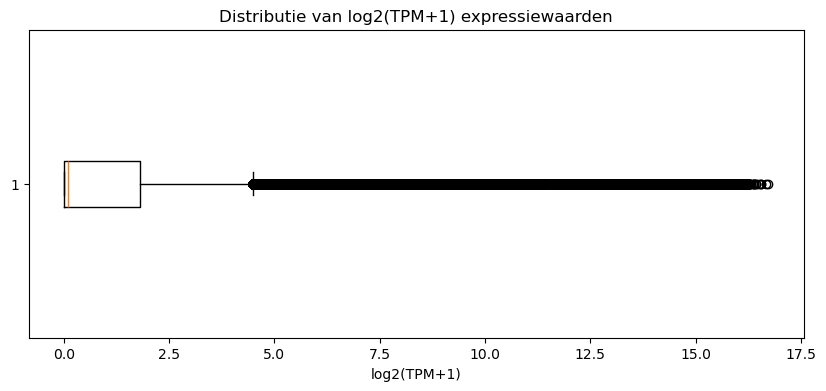

In [ ]:
plt.figure(figsize=(10,4))
plt.boxplot(expr_log.values.flatten(), vert=False)
plt.xlabel('log2(TPM+1)')
plt.title('Distributie van log2(TPM+1) expressiewaarden')
plt.show()

## Opslaan als CSV

We slaan het getransformeerde dataframe op als CSV in data/processed/.

In [ ]:
output_path = '../data/processed/gene_tpm_v10_brain_cerebellum_log2.csv'
df_log.to_csv(output_path, index=False)
print(f'CSV opgeslagen als: {output_path}')

CSV opgeslagen als: ../data/processed/gene_tpm_v10_brain_cerebellum_log2.csv
